# 三角板目标检测-可视化训练日志

训练模型时在`work_dirs`目录生成记录训练日志，解析其中损失函数、评估指标等信息，并可视化。

同济子豪兄：https://space.bilibili.com/1900783

## 进入mmdetection主目录

In [55]:
import os
path0 = '/home/liangyu/code/mmlab2/2023AI/0601/ear_test/MMPosehomework/content/'
os.chdir(path0)
# import os
# os.chdir(path0 + 'mmdetection')

## 导入工具包

In [56]:
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [57]:
pwd

'/home/liangyu/code/mmlab2/2023AI/0601/ear_test/MMPosehomework/content'

## 载入训练日志

In [58]:
# 日志文件路径
log_path = path0 + 'work_dir/rtmpose_tiny_ear/20230605_103852/vis_data/scalars.json'
log_path

'/home/liangyu/code/mmlab2/2023AI/0601/ear_test/MMPosehomework/content/work_dir/rtmpose_tiny_ear/20230605_103852/vis_data/scalars.json'

In [59]:
with open(log_path, "r") as f:
    json_list = f.readlines()

In [60]:
len(json_list)

4257

In [61]:
eval(json_list[4])

{'lr': 1.6055855855855853e-05,
 'data_time': 0.46409759521484373,
 'loss': 0.0994819462299347,
 'loss_cls': 0.0694180116057396,
 'loss_bbox': 0.03006393425166607,
 'time': 1.3973203659057618,
 'epoch': 1,
 'step': 5}

In [62]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for each in tqdm(json_list):
    if 'coco/bbox_mAP' in each:
        df_test = df_test._append(eval(each), ignore_index=True)
    else:
        df_train = df_train._append(eval(each), ignore_index=True)

100%|██████████| 4257/4257 [00:01<00:00, 2300.91it/s]


In [ ]:
# -eta:剩余训练时间
# -memory:内存使用
# -loss_rpn_cls：rpn层的分类损失（rpn层中对分类进行评估）
# -loss_rpn_bbox：rpn层的回归损失（rpn层中对bbox定位进行评估）
# -loss_cls：分类损失（对分类进行评估，采用真实分类概率决定）
# -loss_bbox：回归损失（对bbox定位进行评估，用于比较真实分类对应的预测参数 tutu 和真实平移缩放参数为 vv 的差别）它在训练过程中是4个损失里面最大的
# -loss:总损失（上面4个损失之和）
# -loss=loss_rpn_cls+loss_rpn_bbox+loss_cls+loss_bbox
# -acc:准确度

In [63]:
df_train

,lr,data_time,loss,loss_cls,loss_bbox,time,epoch,step
0,4.000000e-08,2.260675,0.078642,0.069501,0.009140,3.683188,1.0,1.0
1,4.043964e-06,1.140528,0.100179,0.069481,0.030698,2.329954,1.0,2.0
2,8.047928e-06,0.762061,0.096878,0.069467,0.027411,1.815121,1.0,3.0
3,1.205189e-05,0.573782,0.092943,0.069454,0.023489,1.554934,1.0,4.0
4,1.605586e-05,0.464098,0.099482,0.069418,0.030064,1.397320,1.0,5.0
...,...,...,...,...,...,...,...,...
4195,3.058193e-03,0.066132,0.342400,0.097741,0.244659,0.792366,200.0,4196.0
4196,3.056557e-03,0.066120,0.345861,0.099594,0.246266,0.790947,200.0,4197.0
4197,3.054919e-03,0.066220,0.345521,0.099847,0.245674,0.789524,200.0,4198.0
4198,3.053280e-03,0.066246,0.344176,0.099034,0.245143,0.797805,200.0,4199.0


In [64]:
df_test

,coco/bbox_mAP,coco/bbox_mAP_50,coco/bbox_mAP_75,coco/bbox_mAP_s,coco/bbox_mAP_m,coco/bbox_mAP_l,data_time,time,step
0,0.068,0.291,0.003,-1.0,-1.0,0.068,0.227986,0.415485,5.0
1,0.307,0.738,0.178,-1.0,-1.0,0.307,0.257753,0.380344,10.0
2,0.239,0.752,0.023,-1.0,-1.0,0.239,0.239632,0.367317,15.0
3,0.214,0.848,0.014,-1.0,-1.0,0.214,0.256059,0.363162,20.0
4,0.528,0.966,0.468,-1.0,-1.0,0.528,0.245718,0.358267,25.0
5,0.541,0.957,0.528,-1.0,-1.0,0.541,0.244322,0.359033,30.0
6,0.585,0.970,0.629,-1.0,-1.0,0.585,0.242942,0.359894,35.0
7,0.339,0.970,0.172,-1.0,-1.0,0.339,0.241936,0.361914,40.0
8,0.721,0.968,0.904,-1.0,-1.0,0.721,0.226483,0.356033,45.0
9,0.589,0.967,0.674,-1.0,-1.0,0.589,0.252471,0.373162,50.0


## 导出训练日志表格

In [65]:
df_train.to_csv('训练日志-训练集.csv', index=False)
df_test.to_csv('训练日志-测试集.csv', index=False)

## 设置Matplotlib中文字体

In [66]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [67]:
#Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
#下载 simhei.ttf 字体文件
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

--2023-06-05 15:22:55--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
Resolving zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050868 (9.6M) [application/x-font-ttf]
Saving to: ‘SimHei.ttf.1’

SimHei.ttf.1        100%[===================>]   9.58M  --.-KB/s    in 0.1s    

2023-06-05 15:22:55 (67.2 MB/s) - ‘SimHei.ttf.1’ saved [10050868/10050868]



In [68]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /home/featurize/.cache/matplotlib

import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rc("font",family='SimHei') # 中文字体

/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf: No such file or directory


findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
/home/liangyu/miniconda3/envs/mmlab2/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
/home/liangyu/miniconda3/envs/mmlab2/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.

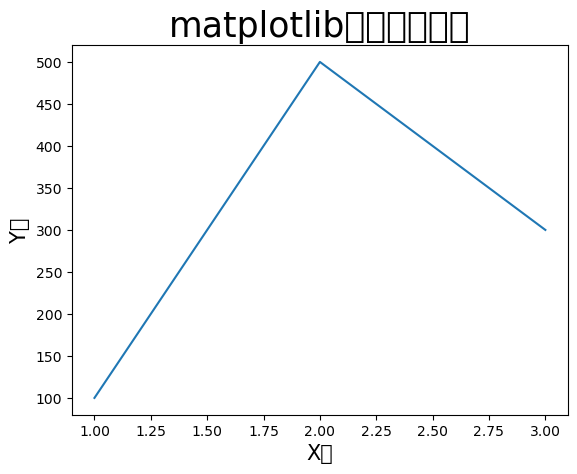

In [69]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

## 可视化辅助函数

In [70]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

## 训练集损失函数

In [71]:
df_train.columns

Index(['lr', 'data_time', 'loss', 'loss_cls', 'loss_bbox', 'time', 'epoch',
       'step'],
      dtype='object')

In [85]:
metrics = ['loss', 'loss_bbox', 'loss_cls']#, 'loss_rpn_cls', 'loss_rpn_bbox']

#metrics = ['lr', 'data_time', 'loss', 'loss_cls', 'loss_bbox', 'time', 'epoch','step']

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not

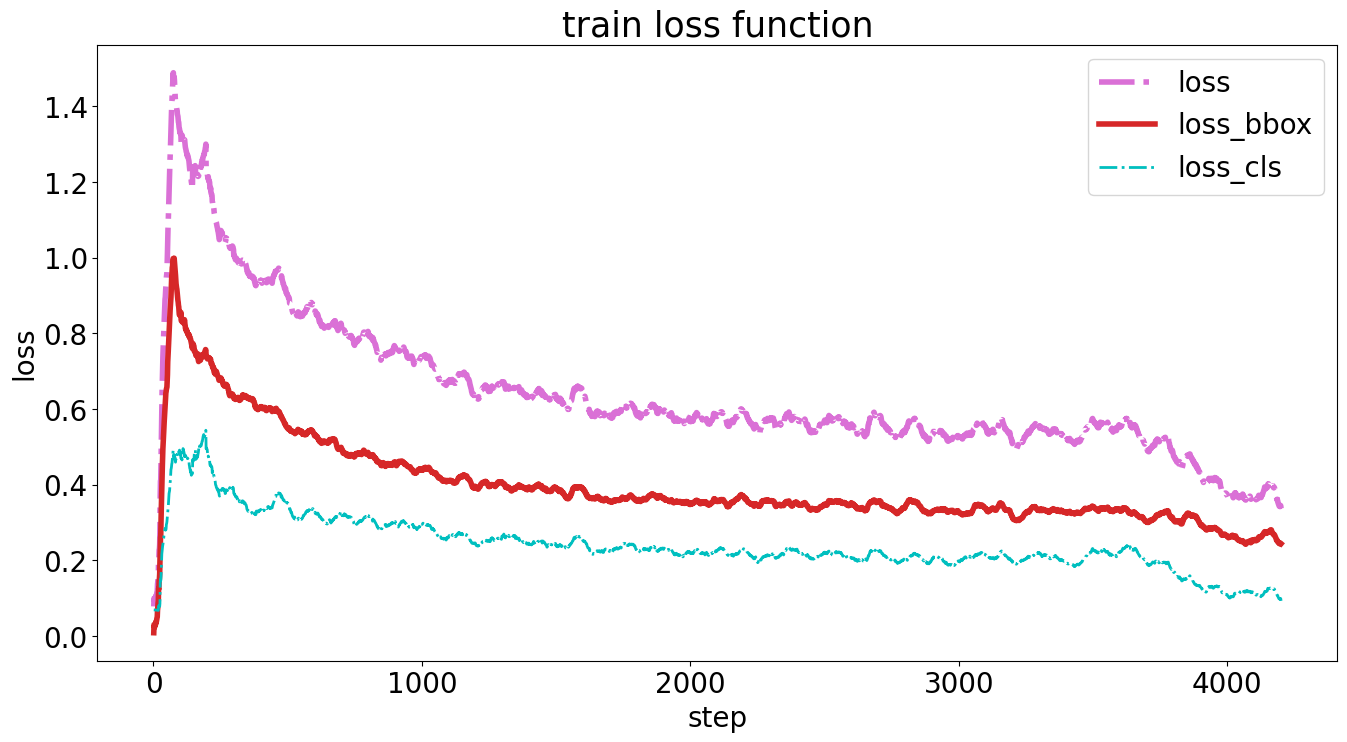

In [86]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('train loss function', fontsize=25)
plt.savefig('train loss function.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

## 训练集准确率

In [90]:
metrics = ['loss']

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
/tmp/ipykernel_1189359/2287259432.py:11: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from current font.
  plt.savefig('训练集准确率.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_1189359/2287259432.py:11: UserWarning: Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from current font.
  plt.savefig('训练集准确率.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_1189359/2287259432.py:11: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from current font.
  plt.savefig('训练集准确率.pdf', dpi=120, bbox_in

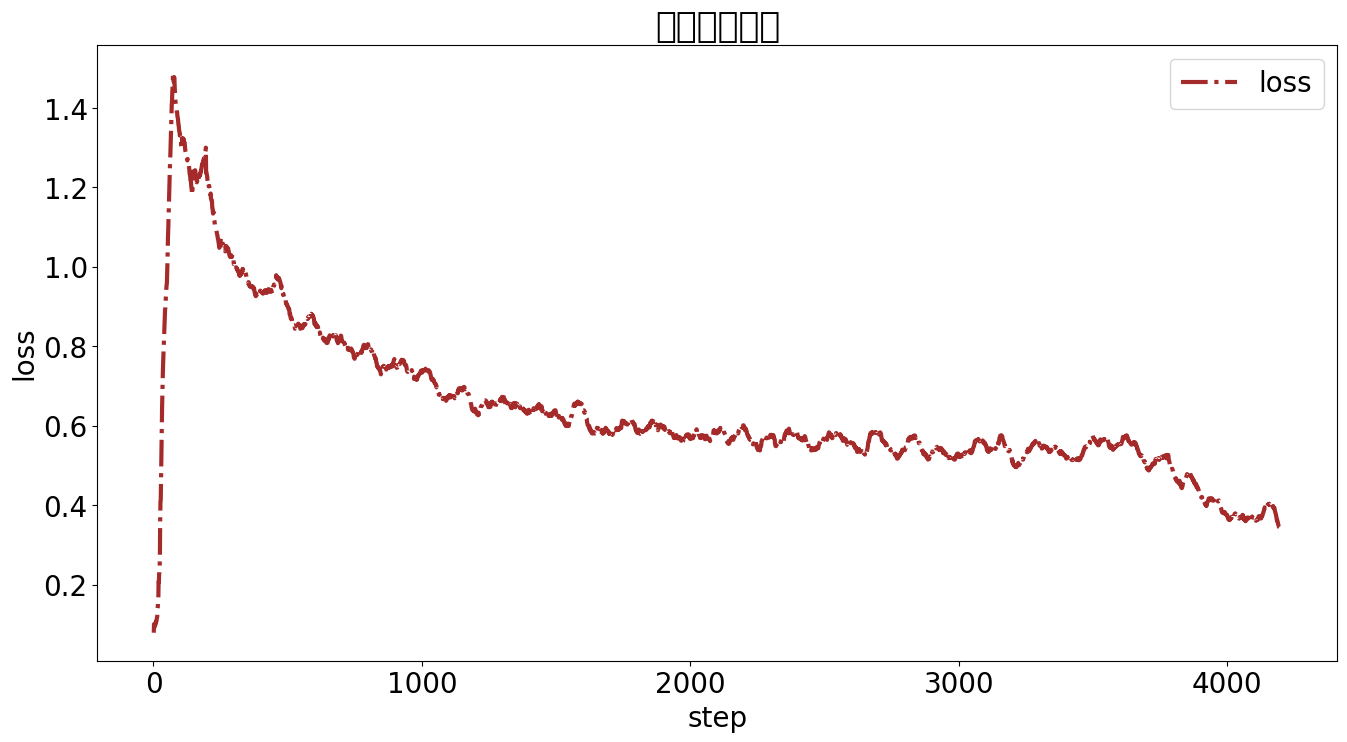

In [91]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集准确率', fontsize=25)
plt.savefig('训练集准确率.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

## 测试集评估指标-MS COCO Metric

In [102]:
df_test.columns

Index(['coco/bbox_mAP', 'coco/bbox_mAP_50', 'coco/bbox_mAP_75',
       'coco/bbox_mAP_s', 'coco/bbox_mAP_m', 'coco/bbox_mAP_l', 'data_time',
       'time', 'step'],
      dtype='object')

In [103]:
metrics = ['coco/bbox_mAP', 'coco/bbox_mAP_50', 'coco/bbox_mAP_75', 'coco/bbox_mAP_s', 'coco/bbox_mAP_m', 'coco/bbox_mAP_l']#,'data_time',       'time', 'step']

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
/tmp/ipykernel_1189359/342112084.py:12: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from current font.
  plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_1189359/342112084.py:12: UserWarning: Glyph 35797 (\N{CJK UNIFIED IDEOGRAPH-8BD5}) missing from current font.
  plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_1189359/342112084.py:12: UserWarning: Glyph 38598 (\N{CJK UNIFIED I

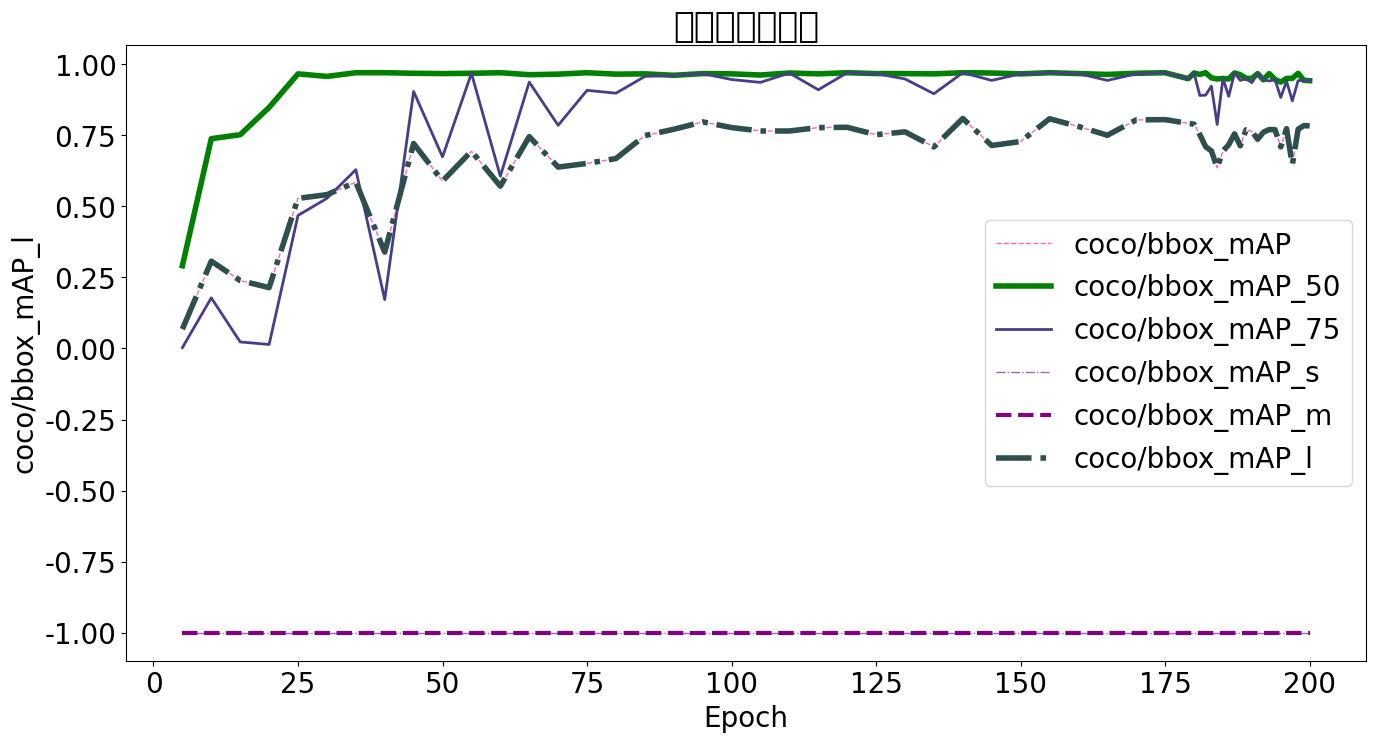

In [104]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    plt.plot(x, df_test[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
# plt.ylim([0, 100])
plt.xlabel('Epoch', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('测试集评估指标', fontsize=25)
plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

## 测试集评估指标-PASCAL VOC Metric

In [107]:
metrics = ['coco/bbox_mAP', 'coco/bbox_mAP_50']

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
/tmp/ipykernel_1189359/342112084.py:12: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from current font.
  plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_1189359/342112084.py:12: UserWarning: Glyph 35797 (\N{CJK UNIFIED IDEOGRAPH-8BD5}) missing from current font.
  plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_1189359/342112084.py:12: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from current font.
  plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_1189359/342112084.py:12: UserWarning: Glyph 35780

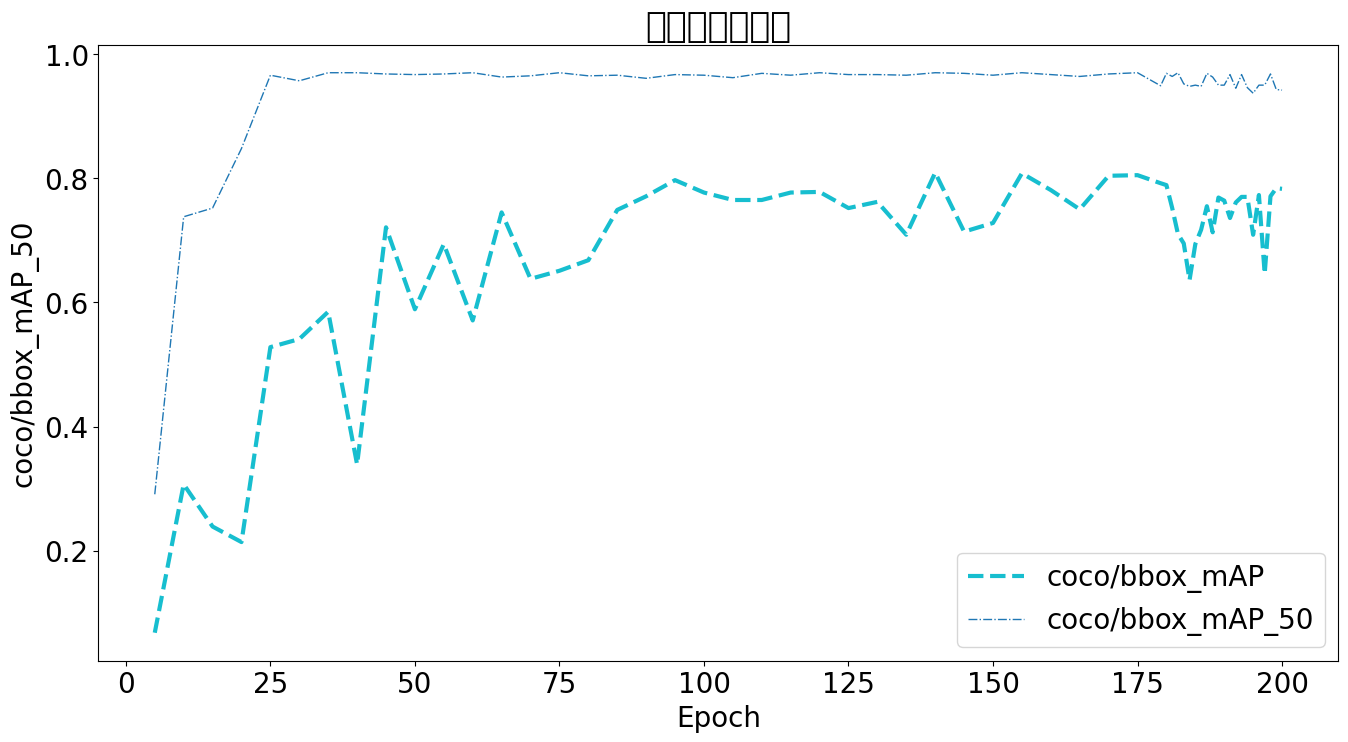

In [108]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    plt.plot(x, df_test[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
# plt.ylim([0, 100])
plt.xlabel('Epoch', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('测试集评估指标', fontsize=25)
plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()